# Cargamos los datos

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector
import os
import warnings

warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('C:/Users/david/Desktop/Curso ML/Pandas/DataCoSupplyChainDataset.csv', encoding='latin1')


In [15]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [17]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [19]:
df.shape

(180519, 53)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [27]:
# convertimos fecha a date time
df['order date (DateOrders)']=pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

In [25]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [29]:
# eliminamos columnas no relevantes
df.drop(columns=['Order Zipcode','Product Description','Product Image','Customer Email','Customer Password'], inplace=True)

In [33]:
# creamos columna de retraso de envio en días
df['shipping_delay'] = df['Days for shipping (real)'] - df['Days for shipment (scheduled)']

In [35]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod 

# Análisis exploratorio

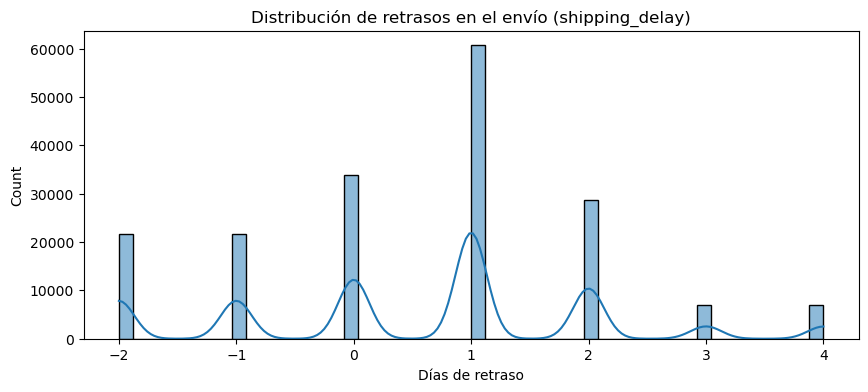

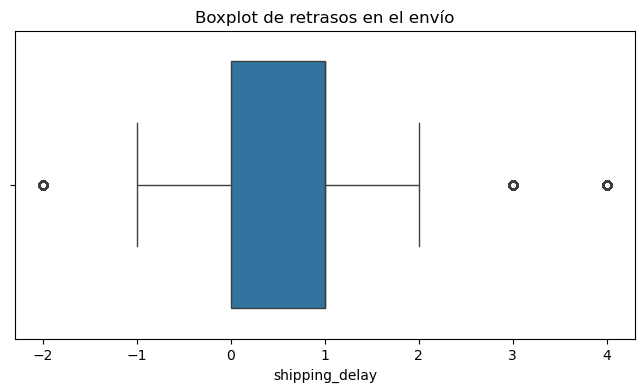

In [37]:
# Histograma y boxplot para identificar valores atípicos (anomalías).
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.histplot(df['shipping_delay'], bins=50, kde=True)
plt.title('Distribución de retrasos en el envío (shipping_delay)')
plt.xlabel('Días de retraso')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['shipping_delay'])
plt.title('Boxplot de retrasos en el envío')
plt.show()


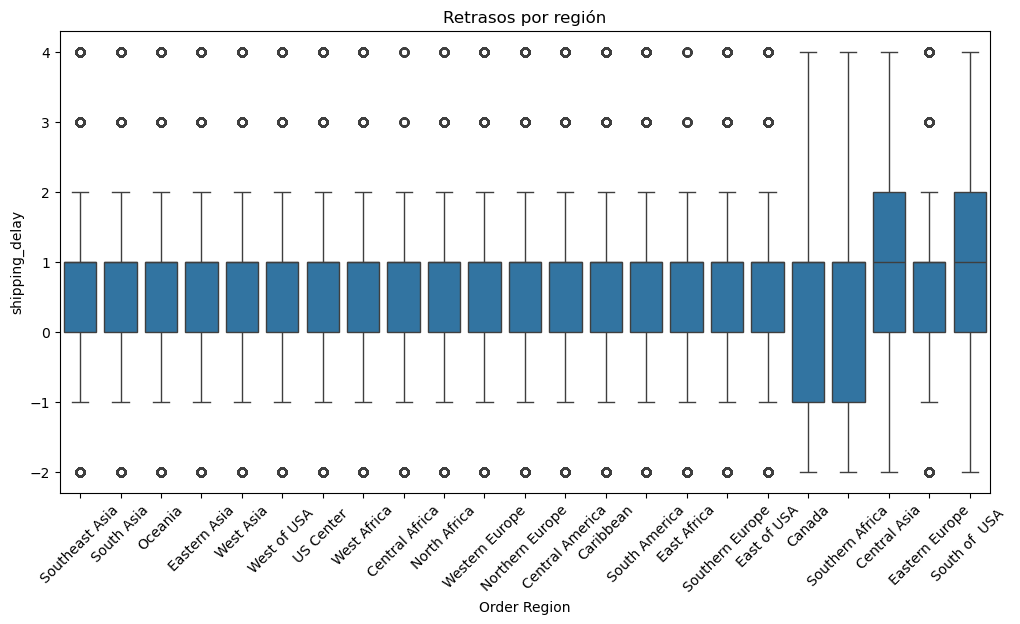

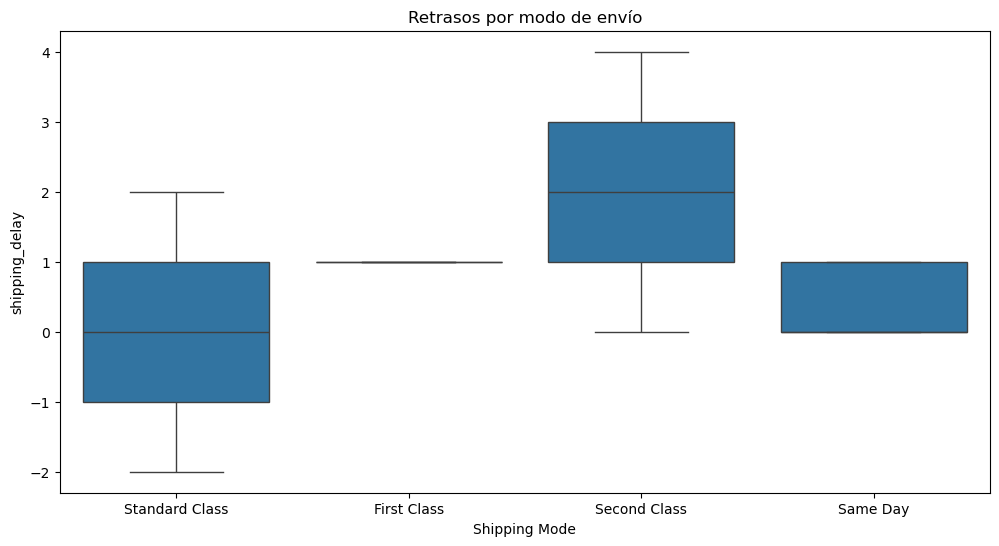

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Order Region', y='shipping_delay', data=df)
plt.title('Retrasos por región')
plt.tick_params('x', rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='Shipping Mode', y='shipping_delay', data=df)
plt.title('Retrasos por modo de envío')
plt.show()


In [47]:
# intentamos detectar anomalías
df['shipping_delay'].value_counts()

shipping_delay
 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: count, dtype: int64

In [51]:
anomaly_threshold = 3
df['is_anomaly'] = (df['shipping_delay'] > anomaly_threshold).astype(int)
df['is_anomaly'].value_counts(normalize=True) # calculada la proporcion (3.9% de anomalías)

is_anomaly
0    0.961317
1    0.038683
Name: proportion, dtype: float64

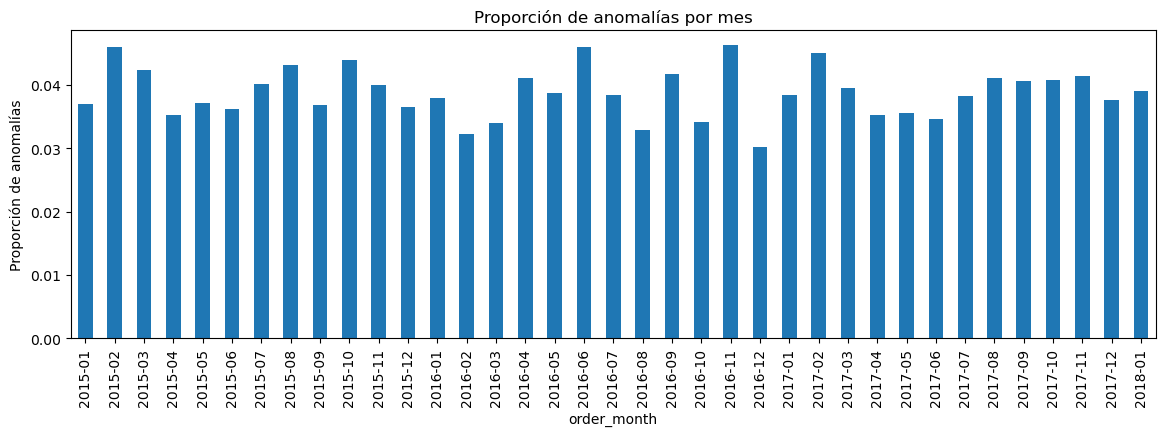

In [53]:
df['order_month'] = df['order date (DateOrders)'].dt.to_period('M')
anomalies_by_month = df.groupby('order_month')['is_anomaly'].mean()
anomalies_by_month.plot(kind='bar', figsize=(14,4), title='Proporción de anomalías por mes')
plt.ylabel('Proporción de anomalías')
plt.show()

# Deteccion Automática de anomalías

In [63]:
from sklearn.ensemble import IsolationForest

# seleccionamos columna para el modelo
X=df[['shipping_delay']]

# entrenamos el modelo
iso_forest=IsolationForest(contamination=0.04,random_state=42) # ajustamos nivel de anomalía esperado


In [81]:
X.value_counts()

shipping_delay
 1                60647
 0                33753
 2                28718
-1                21700
-2                21666
 3                 7052
 4                 6983
Name: count, dtype: int64

In [67]:
# creamos columna con las predcciones
df['anomaly_iforest']=iso_forest.fit_predict(X) # entrenamos y predecimos

# -1 es anomalía y 1 es normal
df['anomaly_iforest']=(df['anomaly_iforest']==-1).astype(int) # convierte el -1 en cero (False) y el 1 lo mantiene (True)

In [73]:
df['anomaly_iforest'].value_counts(normalize=True)

anomaly_iforest
0    0.961317
1    0.038683
Name: proportion, dtype: float64

In [75]:
# detectamos anomalías con la regla IQR
Q1 = df['shipping_delay'].quantile(0.25)
Q3 = df['shipping_delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['anomaly_iqr'] = ((df['shipping_delay'] < lower_bound) | (df['shipping_delay'] > upper_bound)).astype(int)
print(df['anomaly_iqr'].value_counts(normalize=True))

anomaly_iqr
0    0.802231
1    0.197769
Name: proportion, dtype: float64


In [77]:
# comparamos ambos resultados
# Proporción por método
print("Proporción Isolation Forest:", df['anomaly_iforest'].mean())
print("Proporción IQR:", df['anomaly_iqr'].mean())

Proporción Isolation Forest: 0.03868290872428941
Proporción IQR: 0.19776865593095463


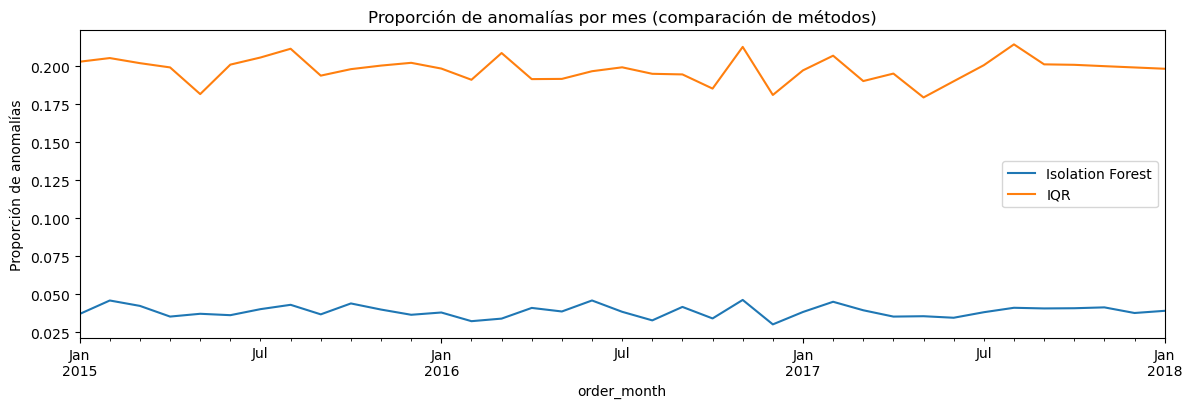

In [79]:
# visualización
df['order_month'] = df['order date (DateOrders)'].dt.to_period('M')
anomalies_iforest_by_month = df.groupby('order_month')['anomaly_iforest'].mean()
anomalies_iqr_by_month = df.groupby('order_month')['anomaly_iqr'].mean()

plt.figure(figsize=(14,4))
anomalies_iforest_by_month.plot(label='Isolation Forest')
anomalies_iqr_by_month.plot(label='IQR')
plt.title('Proporción de anomalías por mes (comparación de métodos)')
plt.ylabel('Proporción de anomalías')
plt.legend()
plt.show()